In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop(['Loan_ID'],axis=1)

In [5]:
for i in df:
    if i not in {'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'}:
        print(f"{i} : ")
        print(df[i].unique())

Gender : 
['Male' 'Female' nan]
Married : 
['No' 'Yes' nan]
Dependents : 
['0' '1' '2' '3+' nan]
Education : 
['Graduate' 'Not Graduate']
Self_Employed : 
['No' 'Yes' nan]
Property_Area : 
['Urban' 'Rural' 'Semiurban']
Loan_Status : 
['Y' 'N']


In [6]:
df.dropna(how='any',inplace=True)

In [7]:
for i in df:
    if i not in {'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'}:
        print(f"{i} : ")
        print(df[i].unique())

Gender : 
['Male' 'Female']
Married : 
['Yes' 'No']
Dependents : 
['1' '0' '2' '3+']
Education : 
['Graduate' 'Not Graduate']
Self_Employed : 
['No' 'Yes']
Property_Area : 
['Rural' 'Urban' 'Semiurban']
Loan_Status : 
['N' 'Y']


In [8]:
mapping = {
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Property_Area':{'Rural':-1,'Urban':1,'Semiurban':0},
    'Loan_Status':{'Y':1,'N':0}
}

In [9]:
df.replace(mapping,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,-1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [10]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)

In [ ]:
df

In [12]:
y_train = df['Loan_Status'].values
x_train = df.drop('Loan_Status',axis=1)

In [13]:
applicant_income_de_normalised = df['ApplicantIncome'].values

In [14]:
# Normalise this : ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term

In [15]:
mean_income = df['ApplicantIncome'].mean()
std_income = df['ApplicantIncome'].std()

mean_coIncome = df['CoapplicantIncome'].mean()
std_coIncome = df['CoapplicantIncome'].std()

mean_LA = df['LoanAmount'].mean()
std_LA = df['LoanAmount'].std()

mean_LAT = df['Loan_Amount_Term'].mean()
std_LAT = df['Loan_Amount_Term'].std()

df['ApplicantIncome'] = (df['ApplicantIncome'] - mean_income) / std_income
df['CoapplicantIncome'] = (df['CoapplicantIncome'] - mean_coIncome) / std_coIncome
df['LoanAmount'] = (df['LoanAmount'] - mean_LA) / std_LA
df['Loan_Amount_Term'] = (df['Loan_Amount_Term'] - mean_LAT) / std_LAT


In [ ]:
df

In [17]:
x_train = df.drop('Loan_Status',axis=1).values

In [18]:
x_train.shape

(480, 11)

In [19]:
y_train.shape

(480,)

In [20]:
w = np.zeros_like(x_train[0])
b = 0.0

In [21]:
'''
gradient descebt function:
    compute_grad --
    compute_cost --
    update weights 
'''

'\ngradient descebt function:\n    compute_grad --\n    compute_cost --\n    update weights \n'

In [22]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [23]:
def compute_grad(x,y,w,b):
    '''
    gradient of logistic regression
    dJ_dw = (fx - y)x
    '''
    dJ_dw = []
    dJ_db = 0 
    for i in range(0,len(w)):
        temp_dJ_dw = 0
        for j in range(0,len(x)):
            temp_dJ_dw += (sigmoid(np.dot(w,x[j]) + b) - y[j])*x[j][i]
        dJ_dw.append(temp_dJ_dw/len(x))
    
    for i in range(0,len(x)):
        dJ_db += (sigmoid(np.dot(w,x[i]) + b) - y[i])
    
    dJ_dw = np.array(dJ_dw)
    dJ_db/=len(x)

    return dJ_dw,dJ_db

    


In [24]:
def compute_cost(w,b,x,y):
    '''
    logistic loss = -(y*(logf(x)) + (1-y)*log(1-f(x)))
    '''
    loss = 0
    for i in range (0,len(x)):
        f_x = sigmoid(np.dot(w,x[i]) + b)
        loss += -1*(y[i]*(np.log(f_x)) + (1-y[i])*(1 - f_x))
    cost = loss/len(x)
    return cost

In [25]:
def gradient_descent(x,y,w,b,lr,iterations):
    dJ_dw = []
    dJ_db = 0
    loss_history = []
    params = []
    for i in range(0,iterations):
        dJ_dw, dJ_db = compute_grad(x,y,w,b)
        w = w - lr*dJ_dw
        b = b - lr*dJ_db
        loss = compute_cost(w,b,x,y)
        loss_history.append(loss)
        params.append([w,b])
        print(loss)
    return loss_history, params, w, b
        

In [ ]:
loss_history, params, w_final, b_final = gradient_descent(x_train,y_train,w,b,lr=0.003,iterations=20000)

In [28]:
w_final


array([-0.13687291,  0.3315687 ,  0.02606546, -0.02491729, -0.18736995,
        0.00680984, -0.08845017, -0.13684307, -0.02833583,  2.07322361,
        0.07264458])

In [29]:
b_final

-0.902184252153749

In [37]:
predictions = []
abs_val = []
for i in range(0,len(x_train)):
    pred = sigmoid(np.dot(w_final,x_train[i])+b_final)
    abs_val.append(np.dot(w_final,x_train[i])+b_final)
    if(pred>=0.5):
        pred = 'Y'
    else:
        pred = 'N'
    
    predictions.append(pred)


In [56]:
len(predictions)

480

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,-0.137826,-0.027923,-0.207872,0.275254,1.0,-1,0
2,1,1,0,1,1,-0.417101,-0.604003,-0.977981,0.275254,1.0,1,1
3,1,1,0,0,0,-0.490668,0.296791,-0.307241,0.275254,1.0,1,1
4,1,0,0,1,0,0.112163,-0.604003,-0.046398,0.275254,1.0,1,1
5,1,1,2,1,1,0.009310,0.998936,1.518661,0.275254,1.0,1,1


In [53]:
df_new = pd.read_csv('Loan_Data.csv')

In [54]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df_new.dropna(how='any',inplace=True)

In [44]:
df_new['Predictions'] = predictions

In [52]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Predictions
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Y


In [48]:
df_new.to_csv('result_new.csv')

In [49]:
target = df_new['Loan_Status'].values

In [50]:
true = 0
for i in range(0,len(target)):
    if(target[i]==predictions[i]):
        true+=1

In [51]:
print(f"accuracy: {true/len(target)}")

accuracy: 0.8083333333333333


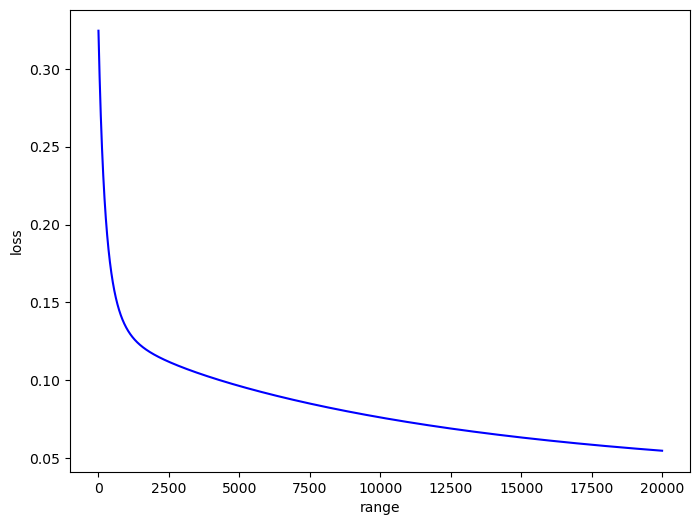

In [28]:
plt.figure(figsize=(8,6))
plt.plot(range(0,20000),loss_history,c='b')
plt.xlabel('range')
plt.ylabel('loss')
plt.show()